In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_source=pd.read_csv('income.csv')

In [3]:
df_source

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [4]:
df_source.rename(columns={'Income($)':'Income'},inplace=True)

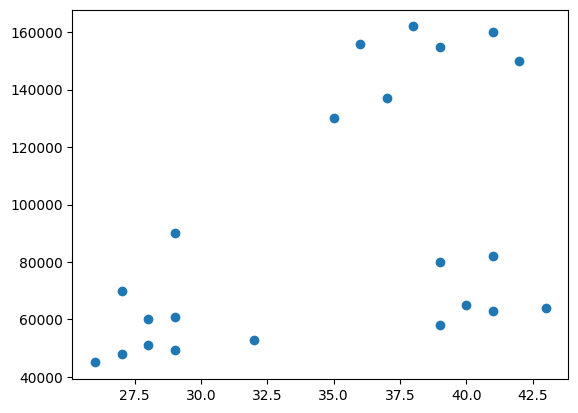

In [16]:
plt.scatter(x=df_source['Age'],y=df_source['Income'])
plt.show()

In [5]:
df=df_source[['Age','Income']]

In [6]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

df=sc.fit_transform(df)

In [7]:
from sklearn.cluster import KMeans

model=KMeans()

In [8]:
sse=[]
krange=range(2,6)
for k in krange:
    model=KMeans(n_clusters=k)
    model.fit(df)
    sse.append(model.inertia_)    

Text(0, 0.5, 'sse')

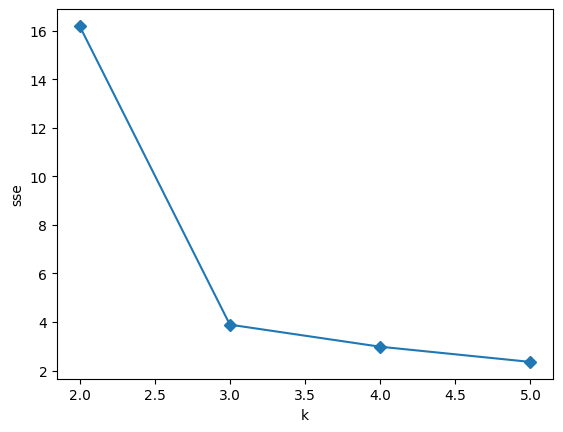

In [9]:
plt.plot(krange,sse,marker='D')
plt.xlabel('k')
plt.ylabel('sse')

In [10]:
# Creating a model with 3 clusters

model=KMeans(n_clusters=3)

y_pred=model.fit_predict(df)

In [11]:
y_pred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [12]:
#Mapping predicted cluster number with the corresponding rows in df

df_source['cluster']=y_pred

In [13]:
df_source

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,2
5,Gautam,39,155000,2
6,David,41,160000,2
7,Andrea,38,162000,2
8,Brad,36,156000,2
9,Angelina,35,130000,2


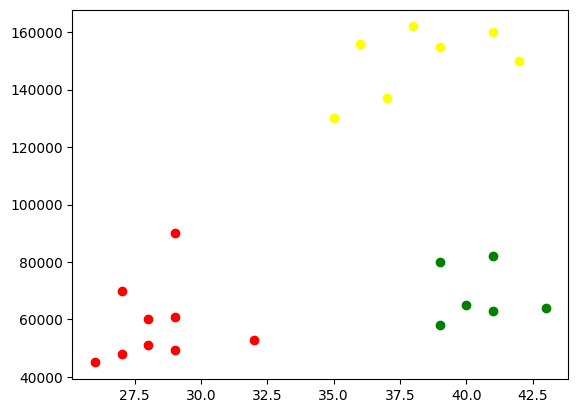

In [21]:
df1=df_source.query('cluster==0')
df2=df_source.query('cluster==1')
df3=df_source.query('cluster==2')


plt.scatter(x=df1['Age'],y=df1['Income'],color='red')
plt.scatter(x=df2['Age'],y=df2['Income'],color='green')
plt.scatter(x=df3['Age'],y=df3['Income'],color='yellow')
plt.show()

array([[-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261],
       [ 0.60143983,  1.40141653]])